# **Project 4**

#  Weather Data for COVID-19 Data Analysis

# Questions
1) How do confirmed cases and fatalities vary over time for different regions?

2) Which countries or regions have the highest and lowest total confirmed cases and fatalities?

3) Is there a correlation between temperature (temp) and the number of confirmed cases or fatalities?


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [69]:
data = pd.read_csv("training_data_with_weather_info_week_1.csv.zip")
data.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,22,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.00,0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,23,42.0,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9,99.99,1
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,24,40.1,36.9,43.2,999.9,1018.6,34.5,0.801794,0.325375,10.4,0.17,1
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,25,46.0,37.9,56.3,999.9,1018.0,37.8,0.728175,0.214562,6.1,0.57,1
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,26,42.8,36.1,53.1,999.9,1014.8,33.2,0.685513,0.231656,10.8,0.00,1


In [70]:
data.describe()

,Id,Lat,Long,ConfirmedCases,Fatalities,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
count,17892.000000,17892.000000,17892.000000,17892.000000,17892.000000,17892.00000,17892.000000,17755.000000,17876.000000,17892.000000,10945.000000,17274.000000,17274.000000,1.727400e+04,17892.000000,17892.000000,17892.000000
mean,13191.500000,26.287693,4.766191,325.207523,11.974737,53.00000,54.849313,45.630262,64.380191,702.306416,1016.581023,42.353630,0.665443,inf,25.521104,7.826334,0.336631
std,7624.675152,22.935092,79.923261,3538.599684,174.346267,18.18475,22.306125,22.900739,22.310919,428.769343,8.490953,22.399517,0.191092,NaN,136.295573,26.740543,0.472571
min,1.000000,-41.454500,-157.498300,0.000000,0.000000,22.00000,-27.200000,-45.400000,-23.800000,0.000000,968.900000,-33.100000,0.053782,-2.374315e+01,0.000000,0.000000,0.000000
25%,6596.250000,13.145425,-71.516375,0.000000,0.000000,37.00000,38.800000,30.200000,47.500000,20.700000,1011.300000,27.000000,0.560904,1.161556e-01,3.500000,0.000000,0.000000
50%,13191.500000,32.985550,9.775000,0.000000,0.000000,53.00000,53.900000,44.400000,64.800000,976.600000,1016.000000,40.800000,0.704800,1.932966e-01,5.600000,0.000000,0.000000
75%,19786.750000,42.501575,64.688975,10.000000,0.000000,69.00000,76.800000,67.500000,84.600000,999.900000,1021.600000,63.500000,0.801220,2.329961e-01,8.700000,0.030000,1.000000
max,26382.000000,71.706900,174.886000,69176.000000,6820.000000,84.00000,97.300000,88.200000,109.600000,999.900000,1051.700000,81.100000,1.000000,inf,999.900000,99.990000,1.000000


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17892 entries, 0 to 17891
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  17892 non-null  int64  
 1   Province/State      8190 non-null   object 
 2   Country/Region      17892 non-null  object 
 3   Lat                 17892 non-null  float64
 4   Long                17892 non-null  float64
 5   Date                17892 non-null  object 
 6   ConfirmedCases      17892 non-null  float64
 7   Fatalities          17892 non-null  float64
 8   day_from_jan_first  17892 non-null  int64  
 9   temp                17892 non-null  float64
 10  min                 17755 non-null  float64
 11  max                 17876 non-null  float64
 12  stp                 17892 non-null  float64
 13  slp                 10945 non-null  float64
 14  dewp                17274 non-null  float64
 15  rh                  17274 non-null  float64
 16  ah  

In [72]:
data.shape

(17892, 20)

In [73]:
data.isnull().sum()

,0
Id,0
Province/State,9702
Country/Region,0
Lat,0
Long,0
Date,0
ConfirmedCases,0
Fatalities,0
day_from_jan_first,0
temp,0


In [74]:
data["Province/State"].replace(np.NaN,data["Province/State"].mode()[0], inplace=True)


<ipython-input-74-db3813f11771>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Province/State"].replace(np.NaN,data["Province/State"].mode()[0], inplace=True)


In [75]:
data.fillna(method = "ffill",inplace = True)
print(data.shape)
data.isnull().sum()

(17892, 20)


<ipython-input-75-d45d06fc0bdc>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method = "ffill",inplace = True)


,0
Id,0
Province/State,0
Country/Region,0
Lat,0
Long,0
Date,0
ConfirmedCases,0
Fatalities,0
day_from_jan_first,0
temp,0


# 1) How do confirmed cases and fatalities vary over time for different regions?

In [76]:
data.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,1,Diamond Princess,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,22,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.00,0
1,2,Diamond Princess,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,23,42.0,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9,99.99,1
2,3,Diamond Princess,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,24,40.1,36.9,43.2,999.9,1018.6,34.5,0.801794,0.325375,10.4,0.17,1
3,4,Diamond Princess,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,25,46.0,37.9,56.3,999.9,1018.0,37.8,0.728175,0.214562,6.1,0.57,1
4,5,Diamond Princess,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,26,42.8,36.1,53.1,999.9,1014.8,33.2,0.685513,0.231656,10.8,0.00,1


In [77]:
df = data.groupby("Country/Region")["ConfirmedCases"].sum().reset_index()
df1 = df.head(20)
df

,Country/Region,ConfirmedCases
0,Afghanistan,363.0
1,Albania,851.0
2,Algeria,1485.0
3,Andorra,720.0
4,Antigua and Barbuda,16.0
...,...,...
158,Uruguay,833.0
159,Uzbekistan,270.0
160,Venezuela,483.0
161,Vietnam,1696.0


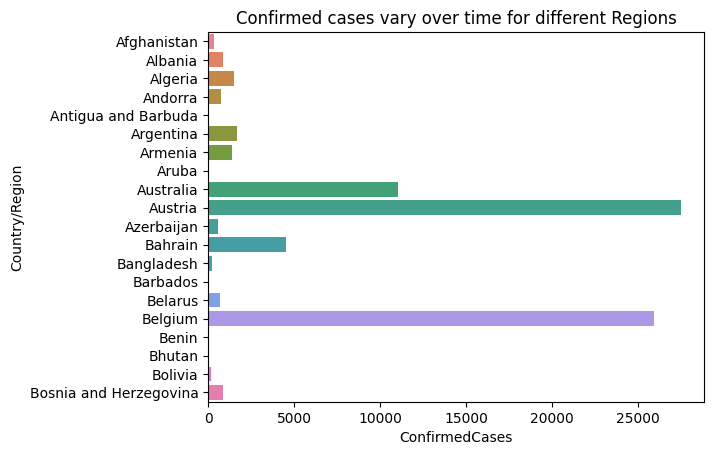

In [78]:
sns.barplot(data = df1,x = "ConfirmedCases",y = "Country/Region",hue = "Country/Region")
plt.title("Confirmed cases vary over time for different Regions")
plt.show()


In [81]:
df = data.groupby("Country/Region")["Fatalities"].sum().reset_index()
df1 = df.head(20)
df

,Country/Region,Fatalities
0,Afghanistan,3.0
1,Albania,26.0
2,Algeria,113.0
3,Andorra,3.0
4,Antigua and Barbuda,0.0
...,...,...
158,Uruguay,0.0
159,Uzbekistan,0.0
160,Venezuela,0.0
161,Vietnam,0.0


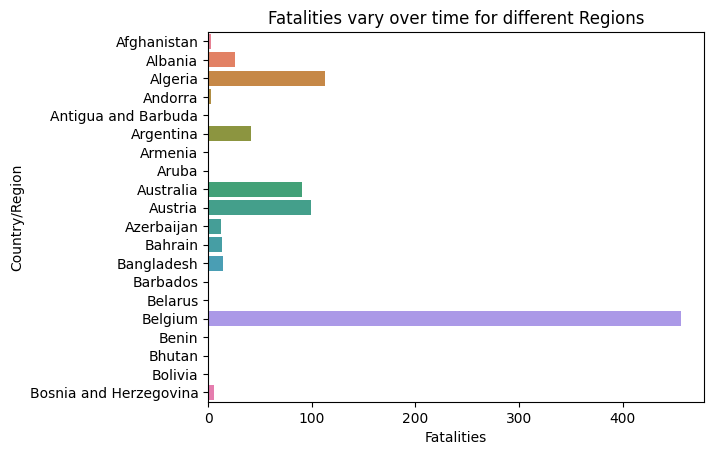

In [82]:
sns.barplot(data = df1,x = "Fatalities",y = "Country/Region",hue = "Country/Region")
plt.title("Fatalities vary over time for different Regions")
plt.show()



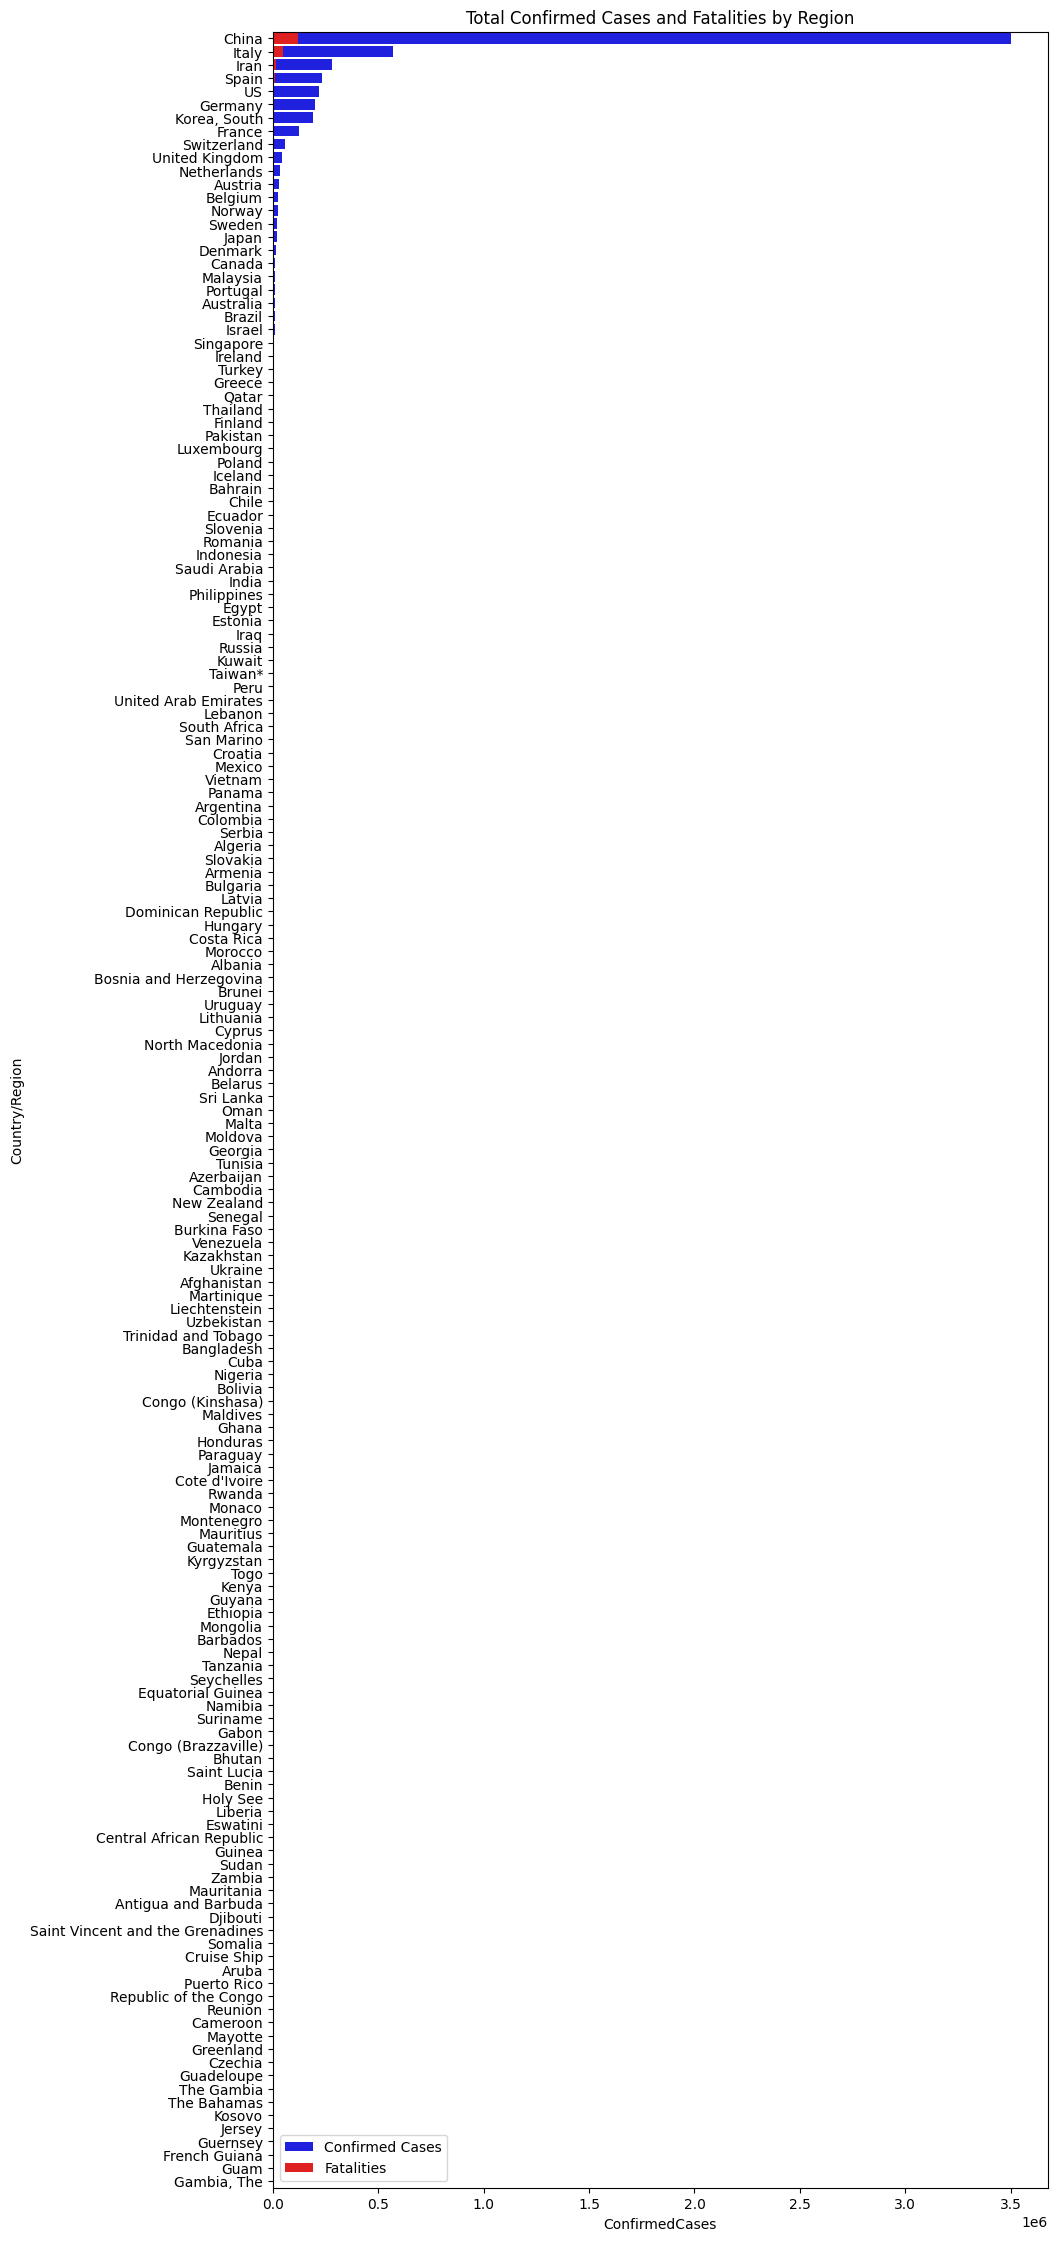

In [83]:
df1 = data.groupby('Country/Region')[['ConfirmedCases', 'Fatalities']].sum().reset_index()
df1 = df1.sort_values(by='ConfirmedCases', ascending=False)

plt.figure(figsize=(10, 28))
sns.barplot(data=df1, x='ConfirmedCases', y='Country/Region', color='blue', label='Confirmed Cases')
sns.barplot(data=df1, x='Fatalities', y='Country/Region', color='red', label='Fatalities')
plt.title('Total Confirmed Cases and Fatalities by Region')
plt.legend()
plt.show()

# 2) Which countries or regions have the highest and lowest total confirmed cases and fatalities?

In [84]:
data.head(2)

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,1,Diamond Princess,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,22,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.00,0
1,2,Diamond Princess,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,23,42.0,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9,99.99,1


In [85]:
df= data.groupby('Country/Region')[['ConfirmedCases', 'Fatalities']].sum()
df.sort_values(by='ConfirmedCases', ascending=False)
df.sort_values(by='Fatalities', ascending=False)

,ConfirmedCases,Fatalities
Country/Region,,
China,3500461.0,121046.0
Italy,571924.0,46856.0
Iran,278992.0,16870.0
Spain,232453.0,12464.0
France,122701.0,3721.0
...,...,...
Holy See,22.0,0.0
Guinea,20.0,0.0
Guernsey,0.0,0.0


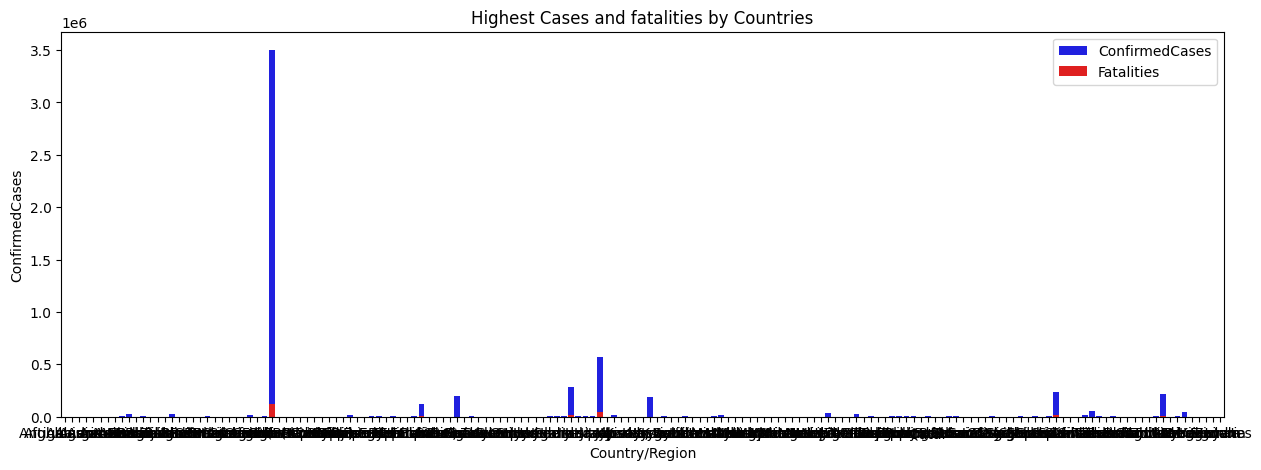

In [98]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='Country/Region',y='ConfirmedCases',color='blue',label='ConfirmedCases')
sns.barplot(data=df,x='Country/Region',y='Fatalities',color='red',label='Fatalities')
plt.title("Highest Cases and fatalities by Countries")
plt.legend()

# 3) Is there a correlation between temperature (temp) and the number of confirmed cases or fatalities?

In [88]:
data[['temp', 'Fatalities']].corr()

,temp,Fatalities
temp,1.000000,-0.005023
Fatalities,-0.005023,1.000000


Text(0.5, 1.0, 'Confirmed cases by temperature')

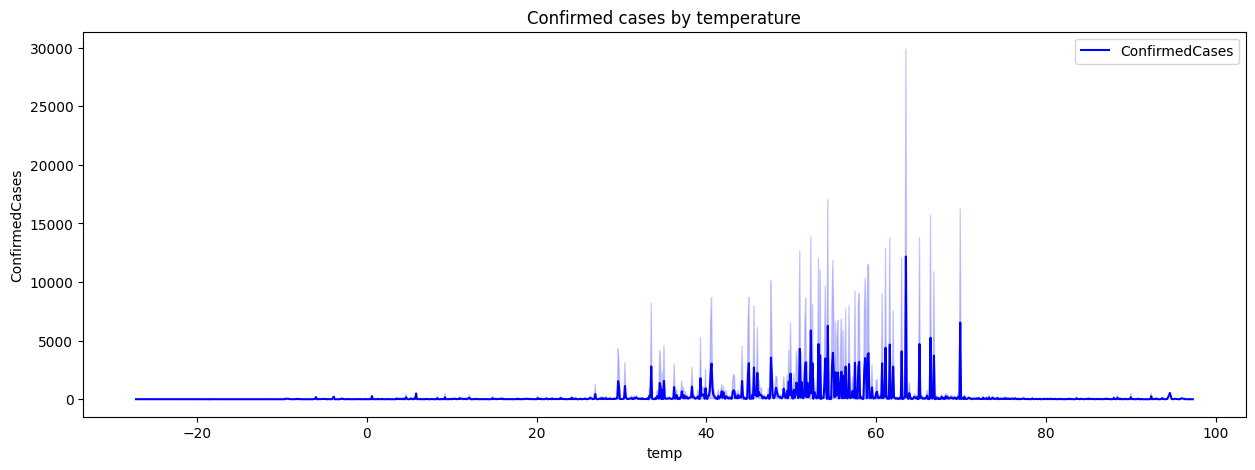

In [91]:
plt.figure(figsize=(15,5))
sns.lineplot(data=cor,x='temp',y='ConfirmedCases',color='blue',label='ConfirmedCases')

plt.legend()
plt.title("Confirmed cases by temperature")

In [86]:
data[['temp', 'ConfirmedCases']].corr()

,temp,ConfirmedCases
temp,1.000000,-0.011405
ConfirmedCases,-0.011405,1.000000


Text(0.5, 1.0, 'Fatalities by temperature')

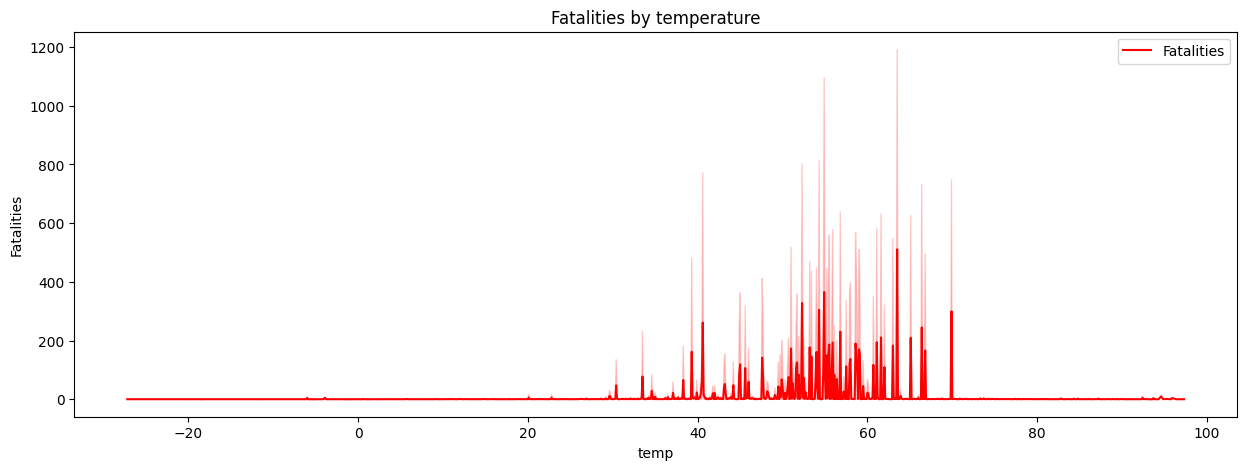

In [92]:
plt.figure(figsize=(15,5))

sns.lineplot(data=cor,x='temp',y='Fatalities',color='red',label='Fatalities')
plt.legend()
plt.title("Fatalities by temperature")

In [89]:
cor=data[['ConfirmedCases','Fatalities','temp']]
cor.head()

,ConfirmedCases,Fatalities,temp
0,0.0,0.0,42.6
1,0.0,0.0,42.0
2,0.0,0.0,40.1
3,0.0,0.0,46.0
4,0.0,0.0,42.8


<Axes: >

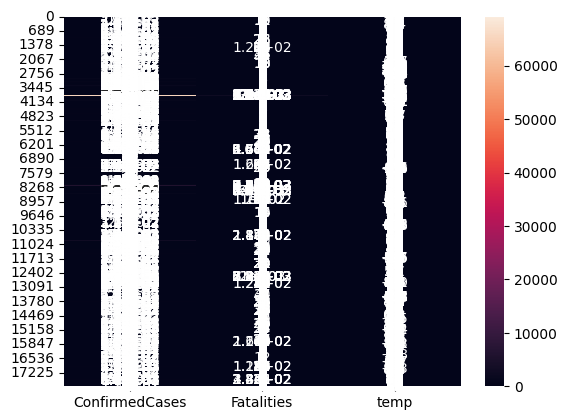

In [93]:
sns.heatmap(cor,annot=True)